In [5]:
import json
import matplotlib.pyplot as plt
import os

In [19]:
file.split('_')

['plot', 'general.ipynb']

(0.0, 150.0, 0.8912509381337456, 11.220184543019636)

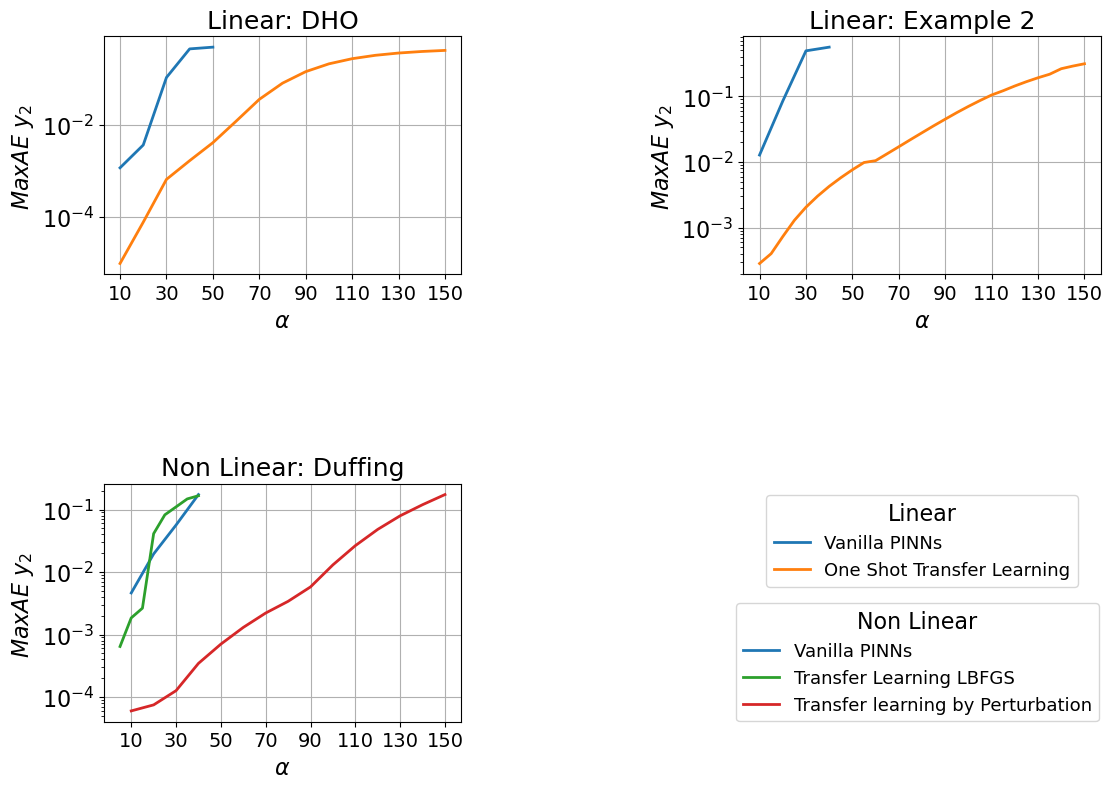

In [172]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)

for  file in os.listdir(os.getcwd()):
    if os.path.splitext(file)[1]== ".json":
        path_file = os.path.join(os.getcwd(), file)
        label = os.path.splitext(file)[0].split('_')[-1]
        equation = file.split('_')[0]
        if label=="Trained":
            label= "Vanilla PINNs"
            color = "#1f77b4"
        elif label=="TrainedIter":
            label= "Transfer Learning LBFGS"
            color = "#2ca02c"
        elif (label=="Transfer") &  (equation != "Duffing"):
            label = "One Shot Transfer Learning"
            color = "#ff7f0e"
        elif (label=="Transfer") &  (equation == "Duffing"):
            label = "Transfer learning by Perturbation"
            color = "#d62728"
        with open(path_file) as f:
            history = json.load(f)
            alpha_list = history["alpha_list"] 
            mae_y1 = history["mae_y1"] 
            mae_y2 = history["mae_y2"] 
            maxae_y1 = history["maxae_y1"]
            maxae_y2 = history["maxae_y2"]
            if equation == "DHO": 
                row = 0; col = 0
                ax[row, col].plot(alpha_list, maxae_y2, label=label, color=color, linewidth=2)
            elif equation == "Example1": 
                row = 0; col = 1
                ax[row, col].plot(alpha_list, maxae_y2, label=label, color=color, linewidth=2)
            if equation == "Duffing":
                row = 1; col = 0
                ax[row, col].plot(alpha_list, maxae_y2, label=label, color=color, linewidth=2)

title_list = ["Linear: DHO", "Linear: Example 2", "Non Linear: Duffing", ""]
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.set_yscale('log')
        col.set_ylabel('$MaxAE$ $y_2$ ', fontsize=16)
        col.set_xlabel(r'$\alpha$', fontsize=16)
        col.grid()
        col.set_xticks(alpha_list[::4])
        col.tick_params(axis='x', labelsize=14)
        col.tick_params(axis='y', labelsize=16)
        col.set_title(title_list[2*i+j], fontsize=18)
        if i==0 and j==1:
            col.legend(title="Linear", title_fontsize=16, loc='lower center', bbox_to_anchor=(0.5, -1.35), fontsize=13)
        if i==1 and j==0:
            col.legend(title="Non Linear", title_fontsize=16, loc='center right', bbox_to_anchor=(2.81, 0.25), fontsize=13)

ax[-1][-1].axis('off')



(0.0, 150.0, 0.8912509381337456, 11.220184543019636)

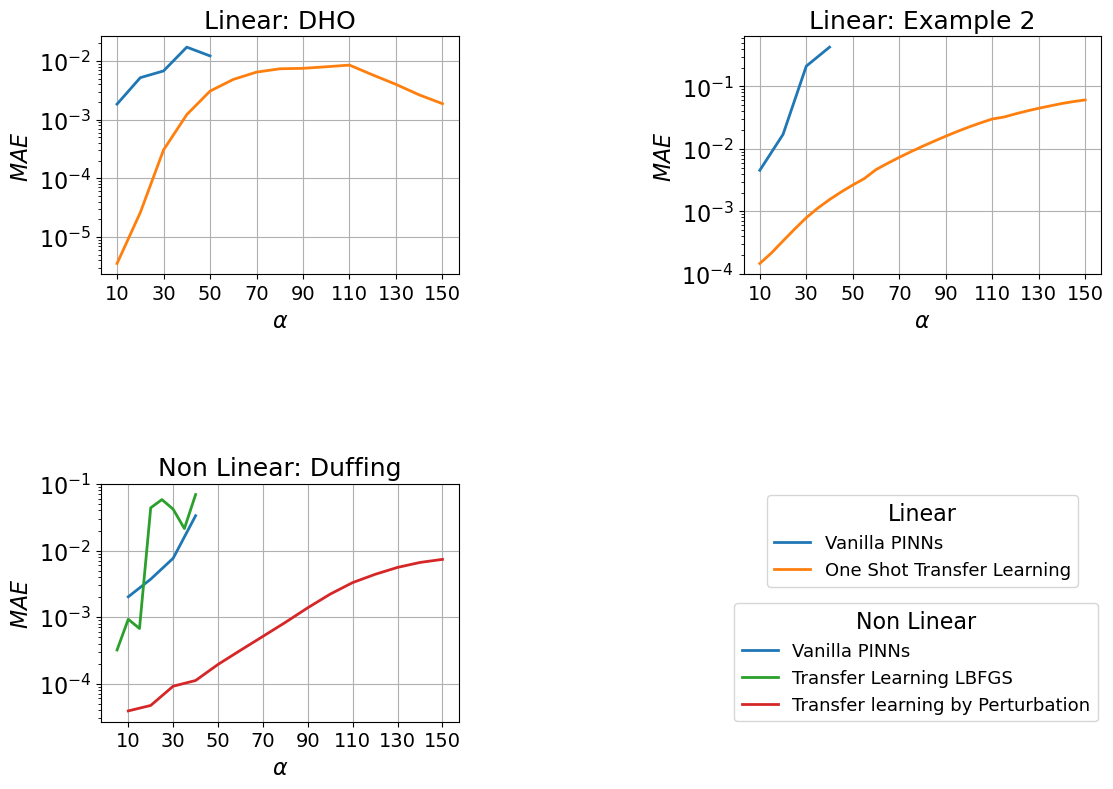

In [173]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)

for  file in os.listdir(os.getcwd()):
    if os.path.splitext(file)[1]== ".json":
        path_file = os.path.join(os.getcwd(), file)
        label = os.path.splitext(file)[0].split('_')[-1]
        equation = file.split('_')[0]
        if label=="Trained":
            label= "Vanilla PINNs"
            color = "#1f77b4"
        elif label=="TrainedIter":
            label= "Transfer Learning LBFGS"
            color = "#2ca02c"
        elif (label=="Transfer") &  (equation != "Duffing"):
            label = "One Shot Transfer Learning"
            color = "#ff7f0e"
        elif (label=="Transfer") &  (equation == "Duffing"):
            label = "Transfer learning by Perturbation"
            color = "#d62728"
        with open(path_file) as f:
            history = json.load(f)
            alpha_list = history["alpha_list"] 
            mae_y1 = history["mae_y1"] 
            mae_y2 = history["mae_y2"] 
            maxae_y1 = history["maxae_y1"]
            maxae_y2 = history["maxae_y2"]
            mean = [i+j/2 for i, j in zip(mae_y1, mae_y2)]
            if equation == "DHO": 
                row = 0; col = 0
                ax[row, col].plot(alpha_list, mean, label=label, color=color, linewidth=2)
            elif equation == "Example1": 
                row = 0; col = 1
                ax[row, col].plot(alpha_list, mean, label=label, color=color, linewidth=2)
            if equation == "Duffing":
                row = 1; col = 0
                ax[row, col].plot(alpha_list, mean, label=label, color=color, linewidth=2)

title_list = ["Linear: DHO", "Linear: Example 2", "Non Linear: Duffing", ""]
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.set_yscale('log')
        col.set_ylabel('$MAE$ ', fontsize=16)
        col.set_xlabel(r'$\alpha$', fontsize=16)
        col.grid()
        col.set_xticks(alpha_list[::4])
        col.tick_params(axis='x', labelsize=14)
        col.tick_params(axis='y', labelsize=16)
        col.set_title(title_list[2*i+j], fontsize=18)
        if i==0 and j==1:
            col.legend(title="Linear", title_fontsize=16, loc='lower center', bbox_to_anchor=(0.5, -1.35), fontsize=13)
        if i==1 and j==0:
            col.legend(title="Non Linear", title_fontsize=16, loc='center right', bbox_to_anchor=(2.81, 0.25), fontsize=13)


ax[-1][-1].axis('off')

# Test

In [1]:
import numpy as np

In [27]:
alpha = [i for i in range(5, 1500, 5)]
SR = [i**2 for i in alpha]
true_SR = [(i**2 + i*(i-4)**(1/2)-2)/2 for i in alpha]


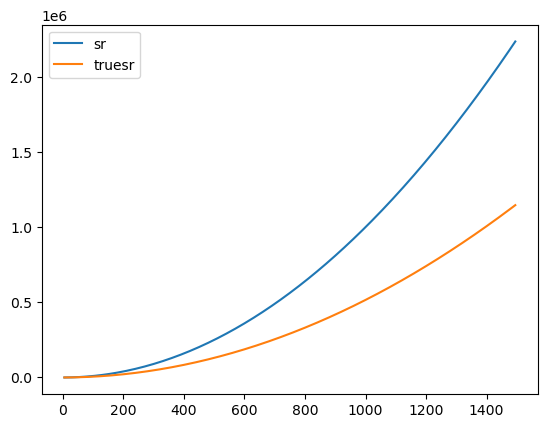

In [28]:
plt.plot(alpha, SR, label="sr")
plt.plot(alpha, true_SR, label="truesr")
plt.legend()